# <a id='toc1_'></a>[Subject: Machine Learning, 19th Feb 2024 - 29th March 2024.](#toc0_)
### <a id='toc1_1_1_'></a>[Topic: Individual Assessment.](#toc0_)
- Research Purpose: Using real-world data sets on supervised learning models to evaluate the classification of two algorithms.

### <a id='toc1_1_2_'></a>[Learning Outcomes:](#toc0_)
- MO1: Compare and contrast the basic principles and characteristics.

**Table of contents**<a id='toc0_'></a>    
- [Subject: Machine Learning, 19th Feb 2024 - 29th March 2024.](#toc1_)    
    - [Topic: Individual Assessment.](#toc1_1_1_)    
    - [Learning Outcomes:](#toc1_1_2_)    
- [Import libraries to run the project:](#toc2_)    
- [Analysis and treatment of dataset (10%):](#toc3_)    
  - [Model Analysis](#toc3_1_)    
    - [SVM](#toc3_1_1_)    
    - [Ensemble](#toc3_1_2_)    
    - [Links:](#toc3_1_3_)    
  - [Data collection and preprocessing:](#toc3_2_)    
    - [Find missing feature values using missingno](#toc3_2_1_)    
    - [Fill missing values with imputing](#toc3_2_2_)    
    - [Feature Scaling (Standardisation):](#toc3_2_3_)    
    - [Transform data](#toc3_2_4_)    
    - [Show the usefulness of the data via a correlation matrix](#toc3_2_5_)    
    - [Create the test and training sets](#toc3_2_6_)    
- [Model and Training (40%):](#toc4_)    
  - [Creating our SVM Model](#toc4_1_)    
    - [Using SVC with Grid Search CV](#toc4_1_1_)    
    - [Get the best parameters from Grid Search CV](#toc4_1_2_)    
  - [Creating our ensemble Model](#toc4_2_)    
      - [Using Random Forest ensemble with AdaBoost](#toc4_2_1_1_)    
- [Prediction and Evaluation (30%):](#toc5_)    
  - [Evaluating the model with Confusion Matrices](#toc5_1_)    
  - [Predicting and evaluating the SVM](#toc5_2_)    
    - [Understanding SVM data with Confusion Matrices](#toc5_2_1_)    
      - [Understanding the SVM Confusion Matrix](#toc5_2_1_1_)    
  - [Predicting and evaluating the Ensemble](#toc5_3_)    
      - [Evaluate performance metrics using Confusion Matrix](#toc5_3_1_1_)    
- [Comparison of Two Models (10%)](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Import libraries to run the project:](#toc0_)

In [1]:
"""
This notebook is part of the Individual Assessment.
It contains two supervised learning models with information
about their use-case and the understanding of different
classifications of real-world datasets comparatively.

Originally made by Reece Turner, 22036698.
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import missingno as msno
import seaborn as sns
import logging # Disable lag from output

logger = logging.getLogger('requests_throttler')
logger.addHandler(logging.NullHandler())
logger.propagate = False

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier
)

# Active root directory of the project folder
current_directory = os.path.dirname(os.path.abspath(__name__))
current_directory += "\\"

# Constant Variables
C_HYPERPARAMETER = 0.0001

# <a id='toc3_'></a>[Analysis and treatment of dataset (10%):](#toc0_)
**Explain and justify the selection of models. Describe the training and the appropriateness of hyperparameters.**

We need to treat the dataset before the SVM and ensemble can use it. Analysing and treating a dataset involves a range of subtasks that are commonly found in Machine Learning. At the most basic form these involve:

- Domain Knowledge - Understanding the data.
- Data Cleaning - Handle missing values.
- Feature Engineering - Creating or transforming features to improve model performance.
- Normalisation/Standardisation - Places all the data into similar ranges to improve the dataset.

**_NOTE:_** Some of the bullet points have subtasks and are dependent on the type of models. An SVM may require Feature Scaling (Standardisation) whereas an ensemble does not due its decision tree based design.

## <a id='toc3_1_'></a>[Model Analysis](#toc0_)
**Describe, explain and justify your approach to building each of the two models.**

### <a id='toc3_1_1_'></a>[SVM](#toc0_)
An SVM is a Machine Learning Algorithm built on supervision with the use of classification or regression to group inputs, also known as features, into their classified support vectors. An extension of this implements kernels to the machine to classify features. These kernels are Radial Basis Function (RBF), non-linear and linear. While Non-linear and RBF can address higher dimensional space, linear can create decision boundaries, called hyperplanes, for input features, $x$, where $H: {x|w^Tx+b = 0}$. The justification of potentially using linear means we can challenge its application and whether or not its comparatively any better than our ensemble and if the potential use is worth the complexity. 

In regards to our selected linear model, the design and implementation will consist of a pre-defined hyperparamter, C, thats trained on with the use of Grid Search Cross validation. This exhaustive search algorithm will fit the SVM to it and should return an optimal hyperparameter solution so help us determine the accuracy and precision scores.

### <a id='toc3_1_2_'></a>[Ensemble](#toc0_)
Ensembles on the other hand are also a supervised learning model with the exception they are built on multiple base learning using decision trees such as Random Forest. Additionally, they can incoroporate ML boosting techniques like XGBoost and AdaBoost (Adapative Boosting) to improve their time complexity and accuracy. Comparatively to SVM, performance is calculated differently on ensembles because feature scaling (normalisation) is not used as algorithm examples like Random Forest or gradient boosting split criteriion into 'stumps' for each input based on their comparative feature values.

Regarding ensembles, we are going to implement Random Forest classification as our base classifier with the settings of a 'weak learner' then train it on an Adaptive Boosting model as the 'strong learner' so that we can achieve high predictive accuracy.

### <a id='toc3_1_3_'></a>[Links:](#toc0_)
"Does Random Forest Need Feature Scaling or Normalization?" (2023) forecastegy.com. [online] Available from: https://forecastegy.com/posts/does-random-forest-need-feature-scaling-or-normalization/#:~:text=Random%20Forest%20is%20a%20tree,can%20be%20skipped%20during%20preprocessing [Accessed 27th March 2024]

"Lecture 3: The Perceptron" (2024) cornell.edu. [online] Available from: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html [Accessed 20th March 2024]

"Lecture 9: SVM" (2024) cornell.edu. [online] Available from: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html [Accessed 20th March 2024]

https://www.youtube.com/watch?v=NnmKeYUYMPY

## <a id='toc3_2_'></a>[Data collection and preprocessing:](#toc0_)
In this section we want to identify which columns in our dataframe are features and which one is the target variable. The reason for providing an $X$ and $y$ is so the model can be trained on only the features while not providing it the actual outcome which would inherently defeat the purpose of supervision.

Comparatively, the models performance is effected by this step in respects to their design. SVMs will have a higher performance if there is no redundent data therefore the use of imputing is required to make sure the data has completeness whereas ensembles are not as sensitive to this occurance so they can make decisions without. This addressed, its not harmful to both algorithms when using imputing therefore we will handle all missing values and follow their respective model processes.

In [2]:
# Load the dataset
data = pd.read_csv(current_directory + "dataset\diabetes.csv")
X_features = data.drop(columns=["Outcome"])
y_target = data["Outcome"]

### <a id='toc3_2_1_'></a>[Find missing feature values using missingno](#toc0_)
The most probable missing features are:
- BMI
- Glucose
- Blood Pressure

We only check these in our data set for '0' because they are likely to be dead or non existent. Moreover, The unspecified features do not directly correlate to diabeties and act more as an evaluation of if someone is. An instance where this occurs is the Diabetes Pedigree Function where 0 is considered healthy and 1 is considered diabetic.

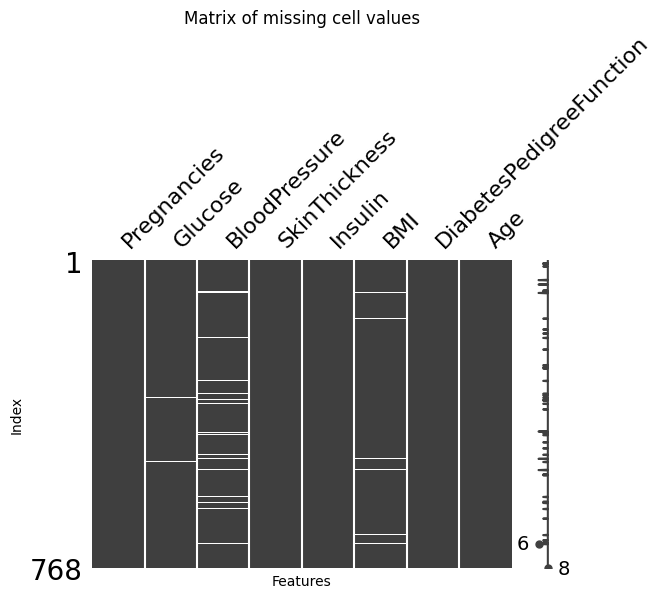

In [3]:
# Get the feature columns
cols = ["Glucose", "BloodPressure", "BMI", "Age"]
missing_values = X_features
missing_values[cols] = missing_values[cols].replace(0, np.nan)

# Create a matrix of features to observe missing ones.
# Any horizontal lines within the columns indicate a missing value.
# The vertical line on the right of the plot indicates data completeness.
msno.matrix(missing_values, figsize=(6, 4))
plt.title("Matrix of missing cell values")
plt.ylabel("Index")
plt.xlabel("Features")
plt.show()


### <a id='toc3_2_2_'></a>[Fill missing values with imputing](#toc0_)
Now that we identified which columns produce values with invalid data, we can now address this using a technique called imputing. To perform imputing we need to build a model that can predict the missing values during its transform then from there this will become our X_features dataset.

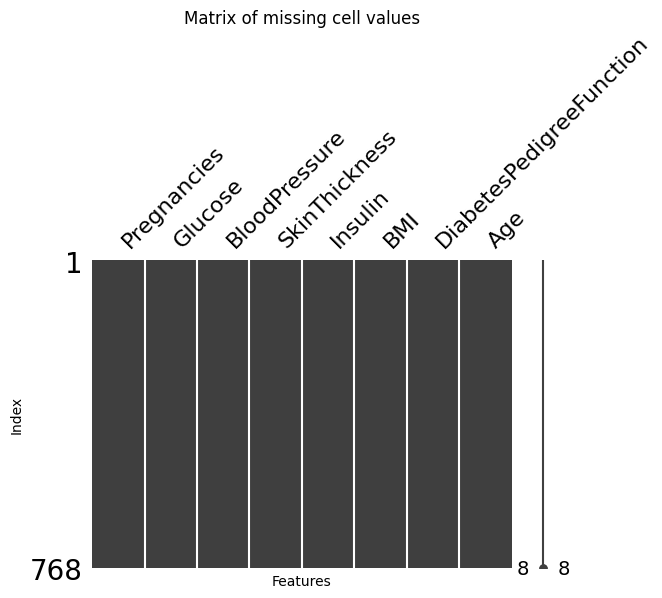

In [4]:
# Use iterative imputing and refine results over x times.
# This can be beneficial for data accuracy but iterations
# on large datasets can increase time complexity.
imputer = IterativeImputer(
    max_iter=10,
    random_state=0
)

# Fit and transform the dataset
# This now becomes our features for train test split.
X_features = imputer.fit_transform(missing_values)
X_features = pd.DataFrame(X_features, columns=missing_values.columns)
# X_features.to_csv("imputed_diabetes.csv", index=False)

# Graph the updated features
msno.matrix(X_features, figsize=(6, 4))
plt.title("Matrix of missing cell values")
plt.ylabel("Index")
plt.xlabel("Features")
plt.show()

### <a id='toc3_2_3_'></a>[Feature Scaling (Standardisation):](#toc0_)
Now that we have data completeness and performed test train split, now we can address the SVM data handling via standarisation using sklearns Standard Scaler.

**_Note_**: It's worth mentioning that a pipeline is normally used for this process as it lets you implement a range of scaling techniques like chaining preprocesses.

In [5]:
# Create a standard scaler for our features.
# For our configuration we have no additional
# pipeline steps therefore a simple object should suffice.
svm_scaler = StandardScaler()
svm_scaler.fit(X_features)

StandardScaler()

### <a id='toc3_2_4_'></a>[Transform data](#toc0_)
After creation, we need to transform the features to prevent overhead. This is performed by the transform function. The function uses ML preprocessing techniques called centering and scaling for this particular standardisation. From there this will become our SVM standardised data.

Once data completeness has been obtained we need to transform our features into appropriate ranges our models using centering and scaling. 

$transform(X) : y$ s.t. $x$ is the centered and scaled features and $y$ is the returned transformed features.
- Centering substracts the mean of each feature from all values in the column.
- Scaling adjusts the range of values of each feature. This can either involve z-score scaling or min-max scaling.

**_NOTE_**: sklearn will handle this part of scaling through the use of their scaler objects.

In [6]:
# Transform our scaled data
standardised_data = svm_scaler.transform(X_features)

# Our previous features are transformed and now became svm features.
svm_features = standardised_data

# Output the transformed data
print(svm_features, "\n", np.array(y_target))

[[ 0.63994726  0.86715125 -0.03294637 ...  0.17256069  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20213676 -0.52681296 ... -0.84404892 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01675569 -0.69143515 ... -1.32330773  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.01968647 -0.03294637 ... -0.9021409  -0.68519336
  -0.27575966]
 [-0.84488505  0.14454274 -1.02067955 ... -0.33574412 -0.37110101
   1.17073215]
 [-0.84488505 -0.93937003 -0.19756857 ... -0.29217513 -0.47378505
  -0.87137393]] 
 [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0

### <a id='toc3_2_5_'></a>[Show the usefulness of the data via a correlation matrix](#toc0_)
We are going to use seaborn to display this data. This will help us identify the relationships between the variables to see how the relate to each other. A correlation matrix is an alternative to a hyperplane classification for when there is more than 2 features in the dataset. Visualising this way lets us classifiy relationships on a 2-axis matrix where we can view the importance between features, $x$.

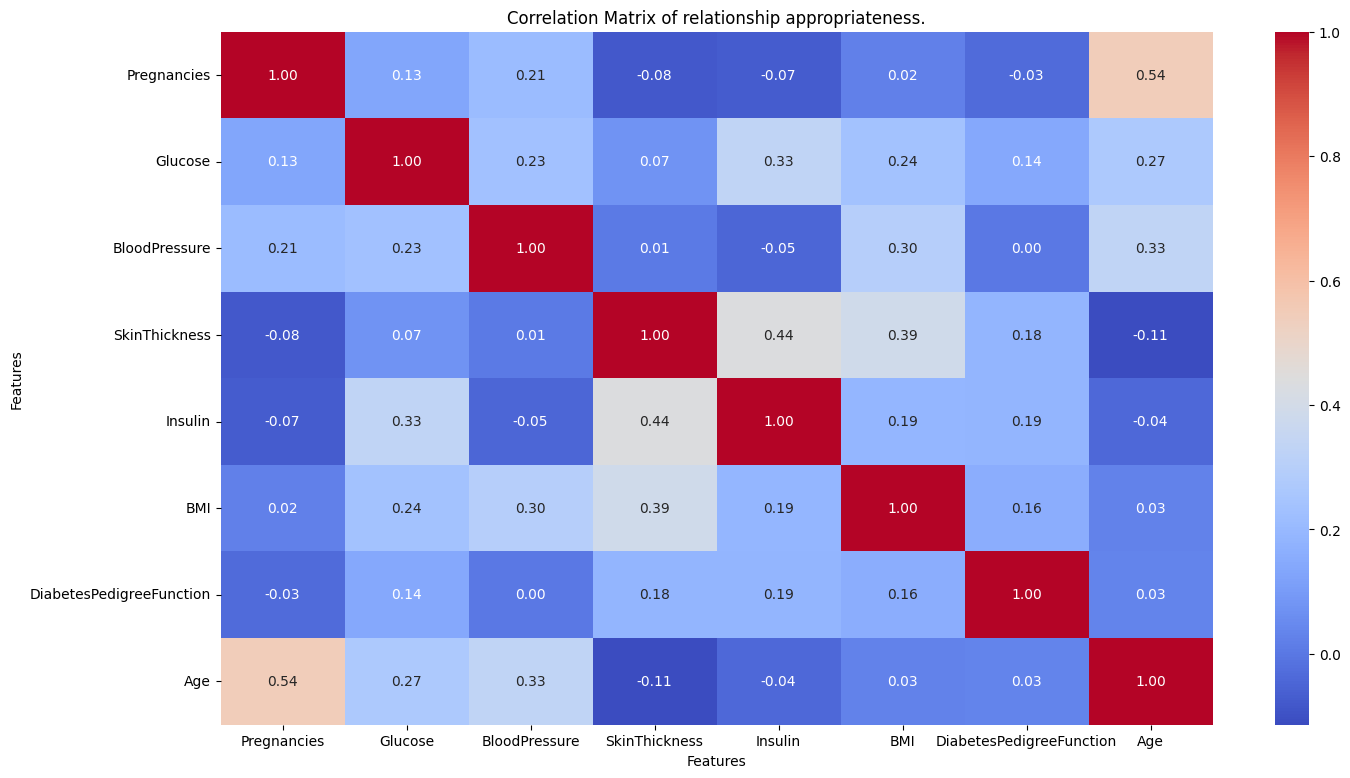

In [7]:
# Create a correlation matrix and display it
correlation_matrix = X_features.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f" # Floating points
)

plt.title("Correlation Matrix of relationship appropriateness.")
plt.ylabel("Features")
plt.xlabel("Features")
plt.show()

Running the cell generates a graph which clearly outlines which features respect or disrespect their pairs. An example of this occuring is Age and Pregnancies having a middle-ground relationship where as the red boxes indicate a strong relationship - probably because they are relating to themselves. This understanding of the features displays insight into the potential performance of the algorithm before train test split is used since the data with the least relationships tend to effect the accuracy later.

**_NOTE_**: Strong Positive values indicate a direct correlation of relationship and vise versa for negative correlation. If the value is 0 or close then theres no or little relationship.

### <a id='toc3_2_6_'></a>[Create the test and training sets](#toc0_)
Since this algorithm is supervised we need to give the testing data a partial amount of the holistic data so we can assess its score.

![Logo](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg)

Based on the graphic above we will perform a 70-30 split on the data. Doing this means we have a large enough dataset to train the model on whilst ensuring theres enough unseen data for it to learn in the future. This train test split ratio will be beneficial to the algorithms since the trained data helps it manage unprecedented feature data whether it's insignificant or extreme.

"Understanding Train Test Split" (2022) builtin.com. [online] Available from: https://builtin.com/data-science/train-test-split [Accessed 25th March 2024]

In [8]:
# Split the data and keep random state to 0 so we can produce replicable results
X_train, X_test, y_train, y_test = train_test_split(
    svm_features,  # Use the standardised features rather than the original X_features
    y_target,
    test_size=0.3,
    random_state=0
)

print(
    f"Original Features {svm_features.shape[0]} - 100% of the original set.",  # 768 rows + 8 cols
    f"\nX_train Features {X_train.shape[0]}  - {(X_train.shape[0]/svm_features.shape[0])*100}% of the original set.",
    f"\nX_test Features {X_test.shape[0]}   - {(X_test.shape[0]/svm_features.shape[0])*100}% of the original set."
)

Original Features 768 - 100% of the original set. 
X_train Features 537  - 69.921875% of the original set. 
X_test Features 231   - 30.078125% of the original set.


# <a id='toc4_'></a>[Model and Training (40%):](#toc0_)
**Explain and justify the selection of models. Describe the training process and the appropriate selection of hyperparameters.**

In this section, we want to create a model and perform fundamental machine learning practices. Scoring our linear classification model before making adapations will provide a baseline for a C Hyperparameter which we can then work off through a Grid Search CV. This processes can help us determine if the model has improved in performance afterwards.

## <a id='toc4_1_'></a>[Creating our SVM Model](#toc0_)
Create a SVM Classifier Model to fit our data. Since this is our first initialisation of the model we are unaware what the new best hyperparameters are so we assume our constant is the current best.

In [9]:
# Create the Support Vector Classifier
# Later we can implement some techniques to optimise this in searches.
svm_classifier = svm.SVC(
    kernel="linear",
    random_state=0,
    C=C_HYPERPARAMETER
)

Fit the SVM model according to the given training data. If we do not implement a grid search then fitting here instead is required, otherwise passed into grid.

In [10]:
# Fit the model to compare between the intial train instance vs any farther analytics.
svm_classifier.fit(X_train, y_train)
base_svm_y_pred = svm_classifier.predict(X_test)

# Output the accuracy of the model training before grid search.
print(
    f"The intial C hyperparameter of {C_HYPERPARAMETER} generates an accuracy of {accuracy_score(y_test, base_svm_y_pred)*100} %."
    "\nC param cannot be discovered right away due to human intervention needed, we assume there is room for performance improvement."
)

The intial C hyperparameter of 0.0001 generates an accuracy of 67.96536796536796 %.
C param cannot be discovered right away due to human intervention needed, we assume there is room for performance improvement.


### <a id='toc4_1_1_'></a>[Using SVC with Grid Search CV](#toc0_)
Exhaustive search over specified parameter values of an estimator. See <a id='toc4_3_3_'></a>[Fine-tune the hyperparameters of SVM via Grid Search](#toc0_) for incremental accuracy.

The Grid Search CV should include a kernel, random state and a hyperparameter. To make it a fair test random state and kernel are staying the same but the Classifier variable will have a range depending on the size of the dataset. In our case our data is between $100$ to $1000$ therefore we can use $[0.1, 1, 10, 100, 1000]$ incrementing for our sample but it should be noted that ranges too large will generate noise that could cause problems. As a result we can get the new best hyperparameter to use in the attempt to improve performance.

In [11]:
# Create grid search params.
# We are not using gamma since our kernel is not RBF.
# 0.1, 1.0, 10.0, 100.0, 1000.0
param_grid = {
    "C": [0.1, 1.0, 10.0, 100.0, 1000.0],
    "kernel": ['linear']
}

# The number of subset (folds) from the current set.
# This is typically a better method for checking accuracy as it
# creates a meta-estimator from the single estimator model for our training.
# Using less extreme numbers prevent overfitting.
cross_validation = 5

grid_search = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid,
    cv=cross_validation,
    scoring="accuracy"  # Forces classification instead of regression.

)

Training the grid search for a single C hyperparameter of SVM. we introduce variations of kernel into the grid search whilst maintaining the same random state, SVM classification kernel and C hyperparameter.

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=0.0001, kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'kernel': ['linear']},
             scoring='accuracy')

### <a id='toc4_1_2_'></a>[Get the best parameters from Grid Search CV](#toc0_)

In [13]:
best_svm_classifier = grid_search.best_estimator_
best_svm_params = grid_search.best_params_

# This metric is the 'cv' performance of the machine learning model.
best_svm_score = grid_search.best_score_

print(
    "****** TRAINING DATA ******",
    "\nSVM Grid Search best (mean) score: %.6f" % (best_svm_score*100) + " %",
    f"\nSVM Grid Search best current estimator: {best_svm_classifier}."
    f"\nSVM Grid Search best current parameters: {best_svm_params}"
)


****** TRAINING DATA ****** 
SVM Grid Search best (mean) score: 77.270682 % 
SVM Grid Search best current estimator: SVC(C=1000.0, kernel='linear', random_state=0).
SVM Grid Search best current parameters: {'C': 1000.0, 'kernel': 'linear'}


## <a id='toc4_2_'></a>[Creating our ensemble Model](#toc0_)
Create a Ensemble Random Forest base classifier then a Adapative Boost classifier to train on.

To make our Random Forest a weak learner we have to set its hyperparameters to low depth searching properties, vise versa for strong learners. Restricting the complexity of its learning will reduce the models risk of overfitting which is helpful for our high dimensional dataset.

"Random Forest and Boosting" (2022) cornell.edu [online] Available from: https://www.cs.cornell.edu/courses/cs4780/2022sp/notes/Notes22.pdf [Accessed 27th March 2024]

In [14]:
# Create the base random forest classifier
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_depth=3,
    random_state=0,
    max_features="log2",
)

# Create a ada boost classifier and pass in the single
# estimator/model.
ab_classifier = AdaBoostClassifier(
    estimator=rf_classifier,
    n_estimators=100,
    random_state=0,
    algorithm="SAMME"  # Using SAMME since SAMME.R is deprecated.
)

#### <a id='toc4_2_1_1_'></a>[Using Random Forest ensemble with AdaBoost](#toc0_)

In [15]:
# Fit the data to the model
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(max_depth=3,
                                                    max_features='log2',
                                                    n_estimators=50,
                                                    random_state=0),
                   n_estimators=100, random_state=0)

# <a id='toc5_'></a>[Prediction and Evaluation (30%):](#toc0_)
**Generate and provide clear analysis, explaination and justification of evaluating methods and performance metrics.**

## <a id='toc5_1_'></a>[Evaluating the model with Confusion Matrices](#toc0_)
Since our dataset target variable is base 2, this means it is Binary classification. Binary classification tells us if the data is either True or False and this technique can be useful for visualisation on a Confusion Matrix. To implement this Matrix we can use a library similar to our preprocessing called missingno with the implementation of a heatmap.

![Logo](accuracy_calc.PNG)

*Note: in binary classification, the count of true negatives is
C_{0,0}, false negatives is C_{1,0}, true positives is
C_{1,1} and false positives is C_{0,1} - scikit-learn*

This matrix is designed to show prediction against the actual values of the data in terms of True/False Negatives or positives. This type of matrix will visualise areas where the model lacked accuracy. 

Accuracy being the percentage of correct predictions on a train or test dataset. <br>
Precision is the ratio between True Positives and all the Positives. <br>
Recall measures our model to determine correctly identified True Positives.

$Accuracy = {\frac{\sum TP + TN}{\sum TP + FP + FN + TN}}$ <br>

$Precision$ = ${\frac{\sum TP}{\sum TP + FP}}$ <br>

$Recall$ = $\frac{\sum TP}{\sum TP + FN}$

*F1-Score* = $2 \times \frac{precision * recall}{precision + recall}$

**_NOTE_**: The type of interpreted data is important for deciding if the f1 score is leveraged correctly. In our case, we should prioritise recall more since we are dealing with medical records and we want more True Positives.

## <a id='toc5_2_'></a>[Predicting and evaluating the SVM](#toc0_)
Here we can produce the results of the test data. Using sklearn we want to obtain the classification report of $y$, s.t. $predict(x): y$ where $x$ is the input data (X_test). A classification report tells us our accuracy, precision and recall scores which in affect helps optimise the model further.

If the report tells us that the stats are 100% then its likely to have identical data as to what it was trained with which would *normally* indicate an issue. It is more plausible that a trained data fit score will likely fail as it's not seen the data before. As a result of this judgement its imperative that we train the model first then accuracy score the model on the test data afterwards.

In [16]:
# SVM Model Test data accuracy
# y_test_pred2 = svm_classifier.predict(X_test)

# Use the SVM Grid search best hyperparameter as our fitting
# print(features)
svm_y_test_pred = best_svm_classifier.predict(X_test)

svm_test_accuracy = accuracy_score(
    y_test,
    svm_y_test_pred
)

# SVM Model Test data precision score
svm_test_precision = precision_score(
    y_test,
    svm_y_test_pred,
    average="weighted"
)

# This is the result of the models accuracy from training data
# then testing new data on the model after to see how it responds.
# That explains why doing it without grid search displays the same result.
print(
    "****** SVM TEST DATA ******",
    f"\n{best_svm_classifier}",
    "\nAccuracy score: " + "%.6f" % (svm_test_accuracy*100) + " %",
    "\nPrecision score: " + "%.6f" % (svm_test_precision*100) + " %",
)

****** SVM TEST DATA ****** 
SVC(C=1000.0, kernel='linear', random_state=0) 
Accuracy score: 77.056277 % 
Precision score: 76.196379 %


In [17]:
# Actual values vs Predicted values
actual_values = np.array(y_test)
pred_values = np.array(svm_y_test_pred)
print(actual_values)
print(pred_values)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0]


**_NOTE_**: The actual values are the original outcome column and the predicted values are what the model predicted using the test data.

### <a id='toc5_2_1_'></a>[Understanding SVM data with Confusion Matrices](#toc0_)


TN: 140 
FN: 36 
TP: 38 
FP: 17


Text(50.722222222222214, 0.5, 'True labels')

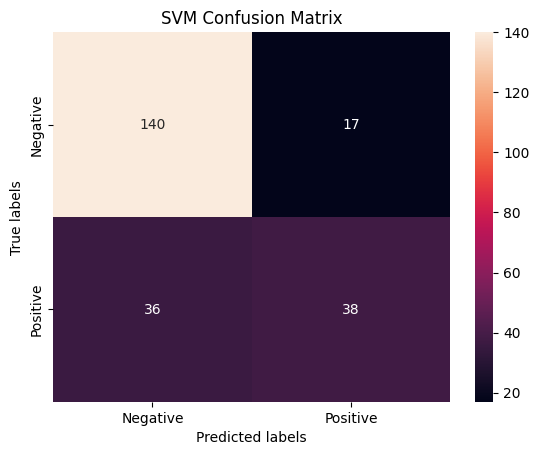

In [36]:
# Plot the confusion matrix using the prediction and test values
def get_confusion_matrix(actual_values, predicted_values):
    """
    Create a sklearn confusion matrix.

    In binary classification, the count of true negatives is
    C_{0,0}, false negatives is C_{1,0}, true positives is
    C_{1,1} and false positives is C_{0,1}.
    """

    return confusion_matrix(
    y_true=actual_values,
    y_pred=predicted_values
)

con_matrix = get_confusion_matrix(actual_values, pred_values)

# Find the values where its incorrect
false_positives = np.where((actual_values == 0) & (pred_values == 1))
false_negatives = np.where((actual_values == 1) & (pred_values == 0))
true_positives = np.where((actual_values == 1) & (pred_values == 1))
true_negatives = np.where((actual_values == 0) & (pred_values == 0))

# Obtain the respective number of tn, fp, fn, tp.
tn, fp, fn, tp = con_matrix.ravel()
print(
    f"\nTN: {tn}",
    f"\nFN: {fn}",
    f"\nTP: {tp}",
    f"\nFP: {fp}",
)

# print("Indexes of False Positives:", false_positives[0])
# print("Indexes of False Negatives:", false_negatives[0])

sns.heatmap(
    con_matrix,
    annot=True,
    fmt="g",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

**_NOTE_**: Our diabetes-description.txt file suggests: "Outcome (1 is interpreted as "tested positive for diabetes" and 0 as "negative")".

#### <a id='toc5_2_1_1_'></a>[Understanding the SVM Confusion Matrix](#toc0_)

Using the recall function, we can accurately show which values are genuine regarding True Positives (TP) and True Negatives (TP).

In [19]:
# Get the percentage how many positives are factual
recall: float = recall_score(actual_values, pred_values)

# Get the percentage how many negatives are factual
specificity: float = con_matrix[0, 0] / (con_matrix[0, 0] + con_matrix[0, 1])

print("Model recall score: %.6f" % (recall*100) + " %")
print("Model specificity score (opposite of recall): %.6f" % (specificity*100) + " %")

print("Note: A 50/50 split would be considered desired in this scenario.")
difference = specificity - recall
percentage_difference = (difference / recall) * 100

# Provide a model_accuracy_allowance as the result is unlikely to be exact precision
model_accuracy_allowance = 5

if percentage_difference > model_accuracy_allowance:
    print(
        "\nIn our evaluation it seems that the difference between true negatives and true positives is "
        + "%.6f" % (percentage_difference) + " %."
        + "\nThis would indicate its likely the prediction may need optimisation and is overfitting."
    )
else:
    print(
        f"\nIt seem that the the difference of {difference} is within the {percentage_difference} percentage difference."
        + "\nTherefore the model is predicting accurately."
    )

Model recall score: 51.351351 %
Model specificity score (opposite of recall): 89.171975 %
Note: A 50/50 split would be considered desired in this scenario.

In our evaluation it seems that the difference between true negatives and true positives is 73.650687 %.
This would indicate its likely the prediction may need optimisation and is overfitting.


In the code above we discovered how the predicted result vs actual 

## <a id='toc5_3_'></a>[Predicting and evaluating the Ensemble](#toc0_)

In [21]:
ab_y_pred = ab_classifier.predict(X_test)


ab_test_accuracy = accuracy_score(
    y_test,
    ab_y_pred
)

ab_test_precision = precision_score(
    y_test,
    ab_y_pred,
    average="weighted"
)

f1 = f1_score(actual_values, ab_y_pred)

print(
    "****** SVM TEST DATA ******",
    f"\n{ab_classifier}",
    "\nAccuracy score: " + "%.6f" % (ab_test_accuracy*100) + " %",
    "\nPrecision score: " + "%.6f" % (ab_test_precision*100) + " %",
    "\nF-1 score: " + "%.6f" % (f1*100) + " %",
)



****** SVM TEST DATA ****** 
AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(max_depth=3,
                                                    max_features='log2',
                                                    n_estimators=50,
                                                    random_state=0),
                   n_estimators=100, random_state=0) 
Accuracy score: 77.489177 % 
Precision score: 77.657119 % 
F-1 score: 65.333333 %
If the result shows the scores similarity we can use an f1 score to test if the classifier is ignoring input.


**_NOTE_**: Accuracy and precision alone does not indicate true performance; because of this we can check how the Ensemble performes using a f1-score.

#### <a id='toc5_3_1_1_'></a>[Evaluate performance metrics using Confusion Matrix](#toc0_)


TN: 130 
FN: 25 
TP: 49 
FP: 27


Text(50.722222222222214, 0.5, 'True labels')

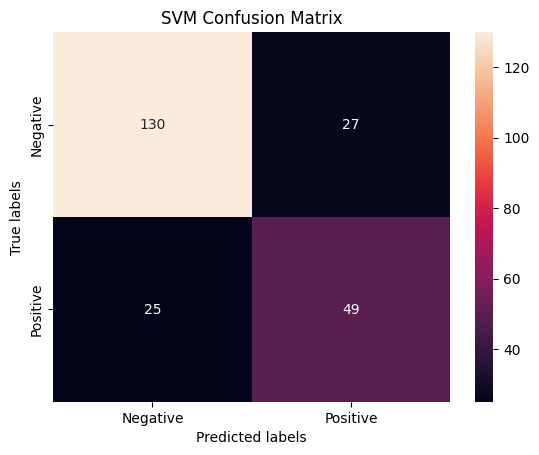

In [34]:
# Display a confusion matrix to relate our f1 score
con_matrix = get_confusion_matrix(actual_values, ab_y_pred)
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Obtain the respective number of tn, fp, fn, tp.
tn, fp, fn, tp = con_matrix.ravel()
print(
    f"\nTN: {tn}",
    f"\nFN: {fn}",
    f"\nTP: {tp}",
    f"\nFP: {fp}",
)

sns.heatmap(
    con_matrix,
    annot=True,
    fmt="g",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

**_NOTE_**: Our diabetes-description.txt file suggests: "Outcome (1 is interpreted as "tested positive for diabetes" and 0 as "negative")".

# <a id='toc6_'></a>[Comparison of Two Models (10%)](#toc0_)

- Summarize the key differences and similarities between SVM and ensemble methods in terms of their algorithmic characteristics and performance.
- Emphasize the importance of considering the specific requirements and constraints of the problem domain when selecting between SVM and ensemble methods.
